In [1]:
# importing all the required external libraries

import seaborn as sb
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

All market data was taken from [MarketWatch](www.marketwatch.com) website which limits downloadable datasets to 1 year at maximum. Although, this doesn't effect the [MA Trading Strategy](#moving-averages-trading-strategy-on-nsenifty50) much but it has a huge effect on the quality of prediction made by the [Predictive Trading Model](#predictive-nsenifty50-signals-using-global-indices) signals. To get a good predictive signal we would have to utilize larger dataset for which we would need to pay some fees.

**June 12th**: __Updated the datasets to include 5 year financial data from WSJ__. Had to modify the code a little but to account for difference in data presentaion between WSJ and MarketWatch.

## Moving Averages Buying Signals for NSE:NIFTY50

### Importing and cleaning the data

In [2]:
nifty = pd.read_csv('data/^NIFTY50.csv')

In [3]:
nifty.head()

,Date,Open,High,Low,Close
0,06/09/23,18655.90,18676.65,18555.4,18563.40
1,06/08/23,18725.35,18777.90,18615.6,18634.55
2,06/07/23,18665.60,18738.95,18636.0,18726.40
3,06/06/23,18600.80,18622.75,18531.6,18599.00
4,06/05/23,18612.00,18640.15,18582.8,18593.85


In [4]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1296 non-null   object 
 1    Open   1296 non-null   float64
 2    High   1296 non-null   float64
 3    Low    1296 non-null   float64
 4    Close  1296 non-null   float64
dtypes: float64(4), object(1)
memory usage: 50.8+ KB


In [5]:
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty.head()

,Date,Open,High,Low,Close
0,2023-06-09,18655.90,18676.65,18555.4,18563.40
1,2023-06-08,18725.35,18777.90,18615.6,18634.55
2,2023-06-07,18665.60,18738.95,18636.0,18726.40
3,2023-06-06,18600.80,18622.75,18531.6,18599.00
4,2023-06-05,18612.00,18640.15,18582.8,18593.85


In [6]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1296 non-null   datetime64[ns]
 1    Open   1296 non-null   float64       
 2    High   1296 non-null   float64       
 3    Low    1296 non-null   float64       
 4    Close  1296 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 50.8 KB


In [7]:
nifty.shape

(1296, 5)

In [8]:
nifty.rename(columns={' Open':'Open', ' High': 'High', ' Low':'Low', ' Close':'Close'}, inplace=True)

In [9]:
nifty.describe()

,Open,High,Low,Close
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,13813.648843,13882.407485,13717.282446,13804.147801
std,3047.983101,3053.335194,3039.085885,3046.696404
min,7735.150000,8036.950000,7511.100000,7610.250000
25%,11070.025000,11126.762500,10999.587500,11072.700000
50%,12267.850000,12288.525000,12213.225000,12261.225000
75%,17127.175000,17224.925000,16990.275000,17108.162500
max,18871.950000,18887.600000,18778.200000,18812.500000


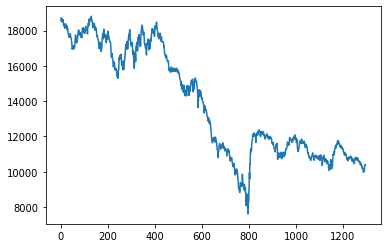

In [10]:
nifty['Close'].plot()
plt.show()

In [11]:
nifty['PriceDiff'] = nifty['Close'].shift(-1) - nifty['Close']

In [12]:
nifty['Return'] = nifty['PriceDiff'] / nifty['Close']
nifty.head()

,Date,Open,High,Low,Close,PriceDiff,Return
0,2023-06-09,18655.90,18676.65,18555.4,18563.40,71.15,0.003833
1,2023-06-08,18725.35,18777.90,18615.6,18634.55,91.85,0.004929
2,2023-06-07,18665.60,18738.95,18636.0,18726.40,-127.40,-0.006803
3,2023-06-06,18600.80,18622.75,18531.6,18599.00,-5.15,-0.000277
4,2023-06-05,18612.00,18640.15,18582.8,18593.85,-59.75,-0.003213


In [13]:
nifty['Direction'] = [1 if nifty['PriceDiff'].loc[i] > 0 else 0 for i in nifty.index]
nifty.head()

,Date,Open,High,Low,Close,PriceDiff,Return,Direction
0,2023-06-09,18655.90,18676.65,18555.4,18563.40,71.15,0.003833,1
1,2023-06-08,18725.35,18777.90,18615.6,18634.55,91.85,0.004929,1
2,2023-06-07,18665.60,18738.95,18636.0,18726.40,-127.40,-0.006803,0
3,2023-06-06,18600.80,18622.75,18531.6,18599.00,-5.15,-0.000277,0
4,2023-06-05,18612.00,18640.15,18582.8,18593.85,-59.75,-0.003213,0


In [14]:
nifty['ma5'] = nifty['Close'].rolling(5).mean()
nifty['ma8'] = nifty['Close'].rolling(8).mean()
nifty['ma10'] = nifty['Close'].rolling(10).mean()
nifty['ma13'] = nifty['Close'].rolling(13).mean()
nifty['ma20'] = nifty['Close'].rolling(20).mean()
nifty['ma50'] = nifty['Close'].rolling(50).mean()
nifty['ma100'] = nifty['Close'].rolling(100).mean()

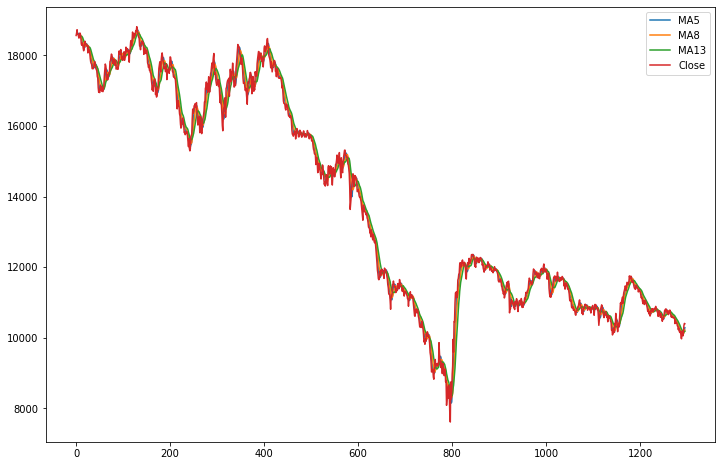

In [15]:
plt.figure(figsize=(12,8))

nifty['ma5'].plot(label='MA5')
nifty['ma8'].plot(label='MA8')
nifty['ma13'].plot(label='MA13')

nifty['Close'].plot(label='Close')

plt.legend()
plt.show()

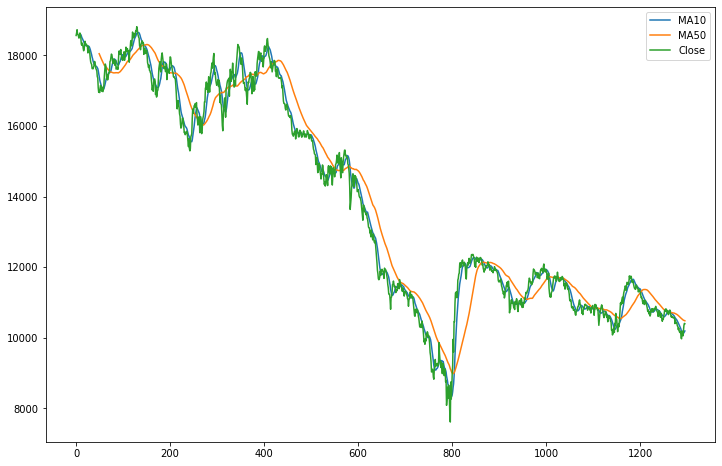

In [16]:
plt.figure(figsize=(12,8))

nifty['ma10'].plot(label='MA10')

nifty['ma50'].plot(label='MA50')

nifty['Close'].plot(label='Close')

plt.legend()
plt.show()

In [17]:
print(nifty)

           Date      Open      High       Low     Close  PriceDiff    Return  \
0    2023-06-09  18655.90  18676.65  18555.40  18563.40      71.15  0.003833   
1    2023-06-08  18725.35  18777.90  18615.60  18634.55      91.85  0.004929   
2    2023-06-07  18665.60  18738.95  18636.00  18726.40    -127.40 -0.006803   
3    2023-06-06  18600.80  18622.75  18531.60  18599.00      -5.15 -0.000277   
4    2023-06-05  18612.00  18640.15  18582.80  18593.85     -59.75 -0.003213   
...         ...       ...       ...       ...       ...        ...       ...   
1291 2018-03-20  10051.55  10155.65  10049.10  10051.55     163.80  0.016296   
1292 2018-03-19  10215.35  10224.55  10075.30  10215.35     129.80  0.012706   
1293 2018-03-16  10345.15  10346.30  10180.25  10345.15      60.30  0.005829   
1294 2018-03-15  10405.45  10420.00  10346.20  10405.45     -12.40 -0.001192   
1295 2018-03-14  10393.05  10420.35  10336.30  10393.05        NaN       NaN   

      Direction       ma5          ma8 

In [18]:
nifty['Shares'] = [1 if nifty.loc[i, 'ma10']>nifty.loc[i,'ma50'] else -1 for i in nifty.index]

In [19]:
nifty['Close1'] = nifty['Close'].shift(-1)
nifty['Profit'] = [nifty.loc[i, 'Close1'] - nifty.loc[i, 'Close'] if nifty.loc[i, 'Shares']==1 else nifty.loc[i, 'Close'] - nifty.loc[i, 'Close1'] for i in nifty.index]

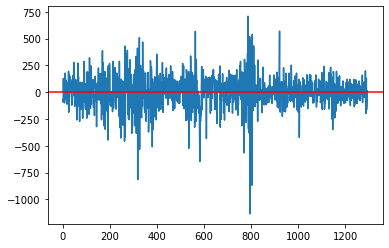

In [20]:
nifty.Profit.plot()
plt.axhline(y=0, color='red')

In [21]:
nifty['Wealth'] = nifty['Profit'].cumsum()
nifty.head()

,Date,Open,High,Low,Close,PriceDiff,Return,Direction,ma5,ma8,ma10,ma13,ma20,ma50,ma100,Shares,Close1,Profit,Wealth
0,2023-06-09,18655.90,18676.65,18555.4,18563.40,71.15,0.003833,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,18634.55,-71.15,-71.15
1,2023-06-08,18725.35,18777.90,18615.6,18634.55,91.85,0.004929,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,18726.40,-91.85,-163.00
2,2023-06-07,18665.60,18738.95,18636.0,18726.40,-127.40,-0.006803,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,18599.00,127.40,-35.60
3,2023-06-06,18600.80,18622.75,18531.6,18599.00,-5.15,-0.000277,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,18593.85,5.15,-30.45
4,2023-06-05,18612.00,18640.15,18582.8,18593.85,-59.75,-0.003213,0,18623.44,NaN,NaN,NaN,NaN,NaN,NaN,-1,18534.10,59.75,29.30


In [22]:
nifty.tail()

,Date,Open,High,Low,Close,PriceDiff,Return,Direction,ma5,ma8,ma10,ma13,ma20,ma50,ma100,Shares,Close1,Profit,Wealth
1291,2018-03-20,10051.55,10155.65,10049.10,10051.55,163.8,0.016296,1,10071.79,10105.27500,10130.365,10168.350000,10273.5025,10504.397,10724.3145,-1,10215.35,-163.8,4605.55
1292,2018-03-19,10215.35,10224.55,10075.30,10215.35,129.8,0.012706,1,10117.03,10113.23750,10124.440,10159.246154,10255.3250,10495.302,10711.5355,-1,10345.15,-129.8,4475.75
1293,2018-03-16,10345.15,10346.30,10180.25,10345.15,60.3,0.005829,1,10192.30,10138.43125,10140.270,10160.969231,10244.7175,10490.625,10700.8620,-1,10405.45,-60.3,4415.45
1294,2018-03-15,10405.45,10420.00,10346.20,10405.45,-12.4,-0.001192,0,10239.89,10165.61250,10165.650,10174.584615,10245.0750,10484.946,10690.6850,-1,10393.05,12.4,4427.85
1295,2018-03-14,10393.05,10420.35,10336.30,10393.05,NaN,NaN,0,10282.11,10216.10000,10190.595,10183.696154,10239.9625,10479.840,10680.6005,-1,NaN,NaN,NaN


<AxesSubplot:>

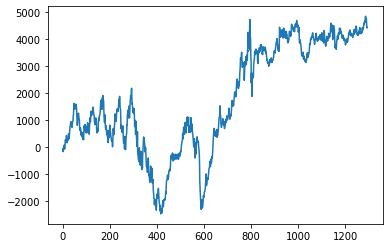

In [23]:
nifty['Wealth'].plot()

In [24]:
nifty['Shares2'] = [1 if nifty.loc[i, 'ma8']>nifty.loc[i,'ma20'] else -1 for i in nifty.index]

In [25]:
nifty['Profit2'] = [nifty.loc[i, 'Close1'] - nifty.loc[i, 'Close'] if nifty.loc[i, 'Shares2']==1 else nifty.loc[i, 'Close'] - nifty.loc[i, 'Close1'] for i in nifty.index]

<AxesSubplot:>

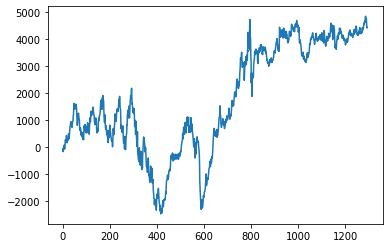

In [26]:
nifty['Wealth'] = nifty['Profit'].cumsum()
nifty['Wealth'].plot()

## Predictive NSE:NIFTY50 Signals using Global Indices

In [28]:
import warnings
warnings.filterwarnings('ignore')

Most of the indices are selected using ChatGPT based on thier effect on the global economy. As Indian stock market is one of the largest markets in the world, hence gobal data effects the direction of the indices a lot. Some of the Asian markets are selected to gain regional biases (Like I selected the STI index from Singapore Exchange because SGX offers Futures and Options Tradings for NSE:NIFTY for foreign investors tence a trend in SGX indices might reflect on the Indian market)

In [29]:
nf = pd.read_csv('data/^NIFTY50.csv')       # re-imporing NIFTY50
djia = pd.read_csv('data/^DJIA.csv')        # Dow Jones Industrial Average
spx = pd.read_csv('data/^SPX.csv')          # S&P500
nsdq = pd.read_csv('data/^NASCOMP.csv')     # Nasdaq Composite
ftse = pd.read_csv('data/^FTSE.csv')        # FTSE100 (London)

Including some Big Indices in the Asian market as it which might effect the Indian Markets

In [30]:
hsi = pd.read_csv('data/^HSI.csv')        # Hang Seng Index (Hong Kong)
nik = pd.read_csv('data/^NIK.csv')        # NIKKEI225 (Japan)
shcomp = pd.read_csv('data/^SHCOMP.csv')  # Shanghai Composite
sti = pd.read_csv('data/^STI.csv')        # Straits Times Index (Singapore)

In [31]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1296 non-null   object 
 1    Open   1296 non-null   float64
 2    High   1296 non-null   float64
 3    Low    1296 non-null   float64
 4    Close  1296 non-null   float64
dtypes: float64(4), object(1)
memory usage: 50.8+ KB


In [32]:
def data_formating(dfs):
    for df in dfs:
        for column in df.columns:
            if column=='Date':
                df[column] = pd.to_datetime(df[column])

In [33]:
dfs = [nf, djia, spx, nsdq, ftse, hsi, nik, shcomp, sti]
data_formating(dfs)

In [34]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1296 non-null   datetime64[ns]
 1    Open   1296 non-null   float64       
 2    High   1296 non-null   float64       
 3    Low    1296 non-null   float64       
 4    Close  1296 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 50.8 KB


In [35]:
for df in dfs:
    df.rename(columns={' Open':'Open', ' High': 'High', ' Low':'Low', ' Close':'Close'}, inplace=True)

In [36]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1296 non-null   datetime64[ns]
 1   Open    1296 non-null   float64       
 2   High    1296 non-null   float64       
 3   Low     1296 non-null   float64       
 4   Close   1296 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 50.8 KB


In [37]:
indice = pd.DataFrame(index=nf.index)

indice['nf'] = nf['Open'].shift(-1) - nf['Open']
indice['nf_lag1'] = indice['nf'].shift(1)

Calculating known market data at the open of the Indian Market as per the timezone of operation of these global indices

In [87]:
# US
indice['spx'] = spx['Close'].shift(1) - spx['Open'].shift(1)
indice['djia'] = djia['Close'].shift(1) - djia['Open'].shift(1)
indice['nsdq'] = nsdq['Close'].shift(1) - nsdq['Open'].shift(1)

# UK
indice['ftse'] = ftse['Close'].shift(1) - ftse['Open'].shift(1)

# Asia
indice['nik'] = nik['Open'] - nik['Open'].shift(1)
indice['sti'] = sti['Open'] - sti['Open'].shift(1)
indice['hsi'] = hsi['Open'] - hsi['Open'].shift(1)
indice['shcomp'] = shcomp['Open'] - shcomp['Open'].shift(1)

indice['Price'] = nf['Open']

In [88]:
indice.head()

,nf,nf_lag1,spx,djia,nsdq,ftse,nik,sti,hsi,shcomp,Price
1,-59.75,69.45,-6.02,24.34,-53.26,-37.38,-49.59,0.01,-105.59,-18.20,18725.35
2,-64.80,-59.75,25.24,176.63,125.25,-24.60,740.99,-7.03,99.31,2.64,18665.60
3,11.20,-64.80,-17.95,102.55,-190.37,-3.76,-630.41,5.48,-210.04,30.94,18600.80
4,-61.15,11.20,12.51,25.61,76.83,28.11,-124.25,26.57,-102.15,3.40,18612.00
5,28.55,-61.15,-9.20,-208.27,-9.05,-7.29,-563.40,-49.11,-448.15,-19.36,18550.85


In [89]:
indice.isnull().sum()

nf          0
nf_lag1     0
spx         0
djia        0
nsdq        0
ftse        0
nik        18
sti         0
hsi         6
shcomp     22
Price       0
dtype: int64

In [90]:
indice = indice.fillna(method = 'ffill')
indice = indice.dropna()

In [91]:
print(indice.shape)

(1295, 11)


## Creating the Model

In [92]:
Train = indice.iloc[-1295:-600, :]
Test = indice.iloc[-600:, :]
print(Train.shape, Test.shape)

(695, 11) (600, 11)


array([[<AxesSubplot:xlabel='nf', ylabel='nf'>,
        <AxesSubplot:xlabel='nf_lag1', ylabel='nf'>,
        <AxesSubplot:xlabel='spx', ylabel='nf'>,
        <AxesSubplot:xlabel='djia', ylabel='nf'>,
        <AxesSubplot:xlabel='nsdq', ylabel='nf'>,
        <AxesSubplot:xlabel='ftse', ylabel='nf'>,
        <AxesSubplot:xlabel='nik', ylabel='nf'>,
        <AxesSubplot:xlabel='sti', ylabel='nf'>,
        <AxesSubplot:xlabel='hsi', ylabel='nf'>,
        <AxesSubplot:xlabel='shcomp', ylabel='nf'>,
        <AxesSubplot:xlabel='Price', ylabel='nf'>],
       [<AxesSubplot:xlabel='nf', ylabel='nf_lag1'>,
        <AxesSubplot:xlabel='nf_lag1', ylabel='nf_lag1'>,
        <AxesSubplot:xlabel='spx', ylabel='nf_lag1'>,
        <AxesSubplot:xlabel='djia', ylabel='nf_lag1'>,
        <AxesSubplot:xlabel='nsdq', ylabel='nf_lag1'>,
        <AxesSubplot:xlabel='ftse', ylabel='nf_lag1'>,
        <AxesSubplot:xlabel='nik', ylabel='nf_lag1'>,
        <AxesSubplot:xlabel='sti', ylabel='nf_lag1'>,
        <Ax

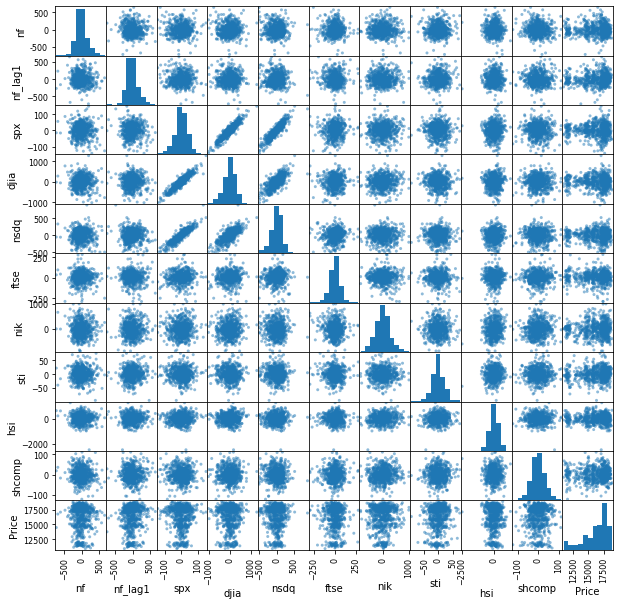

In [93]:
pd.plotting.scatter_matrix(Train, figsize=(10,10))

As it can be seen that there is a lot of noise in the data. Stock market data are known for their large amount of noise in historical data. To draw conclusion, I will be using corr() function from pandas.

In [94]:
corr_array = Train.iloc[:, :-1].corr()['nf']
print(corr_array)

nf         1.000000
nf_lag1   -0.051983
spx       -0.024726
djia      -0.030812
nsdq      -0.036851
ftse      -0.002190
nik       -0.024138
sti        0.005867
hsi       -0.042955
shcomp    -0.069427
Name: nf, dtype: float64


In [95]:
formula = 'nf~nf_lag1+spx+nsdq+djia+ftse+nik+sti+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     nf   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9462
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.477
Time:                        19:45:59   Log-Likelihood:                -4530.2
No. Observations:                 695   AIC:                             9078.
Df Residuals:                     686   BIC:                             9119.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7438      6.298     -1.865      0.063     -24.109       0.621
nf_lag1       -0.0527      0.038     -1.381      0.168      -0.128       0.022
spx            1.7465      0.975      1.792      0.074      -0.167       3.660
nsdq          -0.2438      0.130     -1.870      0.062      -0.500       0.012
djia          -0.1397      0.083     -1.688      0.092      -0.302       0.023
ftse          -0.0071      0.096     -0.074      0.941      -0.195       0.181
nik           -0.0095      0.022     -0.425      0.671      -0.053       0.034
sti            0.1100      0.296      0.372      0.710      -0.471       0.691
hsi           -0.0193      0.018     -1.069      0.286      -0.055       0.016
==============================================================================
Omnibus:                       37.613   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.155
Skew:                           0.358   Prob(JB):                     3.54e-16
Kurtosis:                       4.395   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

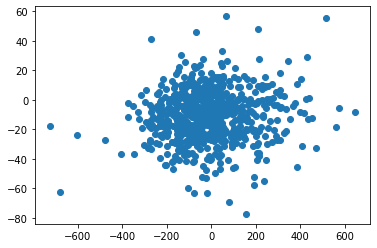

In [97]:
plt.scatter(Train['nf'], Train['PredictedY'])

In [98]:
# RMSE, Adj R^2

def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [99]:
# creating table format for resuability

def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

## Evaluating the Signal Based Strategy Model

Evaluating Profit on Training Data

In [101]:
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['nf'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  12310.650000000001


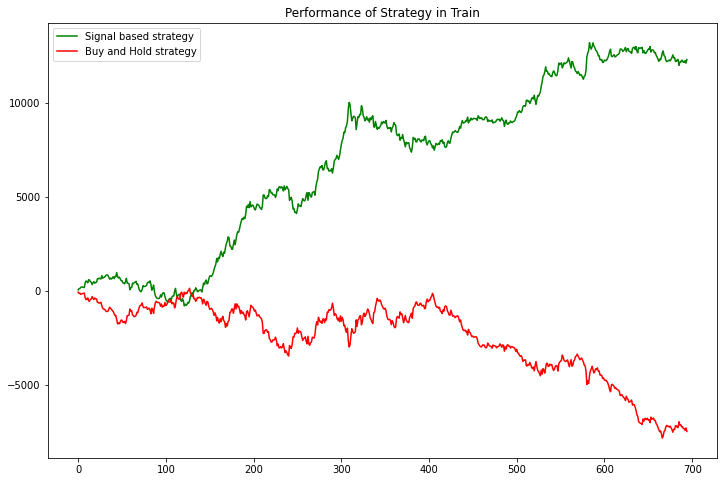

In [102]:
plt.figure(figsize=(12,8))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['nf'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

Buy and hold strategy loses money because the market was in a downtrend during both the test and train period

Evaluating profit on Testing Data

In [103]:
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['nf'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  2714.05000000001


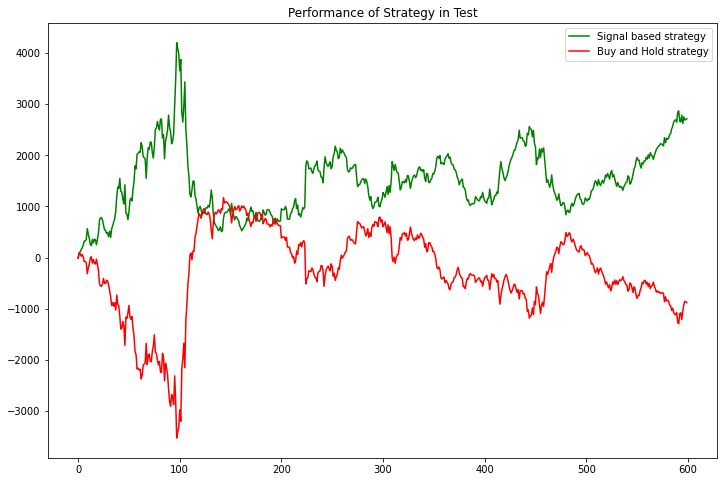

In [104]:
plt.figure(figsize=(12,8))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['nf'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [105]:
Train.head()

,nf,nf_lag1,spx,djia,nsdq,ftse,nik,sti,hsi,shcomp,Price,PredictedY,yhat,Order,Profit,Wealth
1,-59.75,69.45,-6.02,24.34,-53.26,-37.38,-49.59,0.01,-105.59,-18.20,18725.35,-13.556867,-13.556867,-1,59.75,59.75
2,-64.80,-59.75,25.24,176.63,125.25,-24.60,740.99,-7.03,99.31,2.64,18665.60,-29.265422,-29.265422,-1,64.80,124.55
3,11.20,-64.80,-17.95,102.55,-190.37,-3.76,-630.41,5.48,-210.04,30.94,18600.80,3.066701,3.066701,1,11.20,135.75
4,-61.15,11.20,12.51,25.61,76.83,28.11,-124.25,26.57,-102.15,3.40,18612.00,-6.916926,-6.916926,-1,61.15,196.90
5,28.55,-61.15,-9.20,-208.27,-9.05,-7.29,-563.40,-49.11,-448.15,-19.36,18550.85,15.376110,15.376110,1,28.55,225.45


In [106]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [107]:
# Sharpe Ratio on Train data

Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.10963098695073854
Yearly Sharpe Ratio is  1.7403379647493291


In [108]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.03402016809338214
Yearly Sharpe Ratio is  0.5400534260142212


In [109]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.0919439503558307


In [110]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.23893069780829268


# Improvements Possible

* As it can be seen that the predictive model has overfitted on the training data such that the inferior Buy and Hold stratergy defeats the signal based strategy on the testing data. This is most probably due to the small predictive dataset. Financial data could be updated by paying for a service which provides access to it.

* The performance the training data can be achieved with the help of a large dataset as mentioned earlier.

* Indices in growing countries should be targeted. The financial data was taken during the year 2021-22 where the Indian Stock Market was not particularly bullish due to the aftermath of COVID19.

**June 12th**: _Updated Dataset (now taken from WSJ)_


Models show better predictions and the Inferential stats back the claim. Also Sharpe Ratio and Maximum Drawdown was regulated by using larger dataset to train the model




**to be CONTINUED**